In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("top rich2024.csv")
data


,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,$447B,+$62.8B,+$218B,United States,Technology
1,2,Jeff Bezos,$249B,+$4.65B,+$72.1B,United States,Technology
2,3,Mark Zuckerberg,$224B,+$4.58B,+$95.5B,United States,Technology
3,4,Larry Ellison,$198B,+$1.63B,+$75.3B,United States,Technology
4,5,Bernard Arnault,$181B,+$1.32B,-$26.4B,France,Consumer
...,...,...,...,...,...,...,...
495,496,Igor Bukhman,$6.41B,-$27.0M,+$2.86B,Israel,Technology
496,497,Dmitry Bukhman,$6.41B,-$27.0M,+$2.86B,Israel,Technology
497,498,Renate Reimann-Haas,$6.38B,$0,+$2.35B,Austria,Retail
498,499,Matthias Reimann-Andersen,$6.38B,$0,+$2.35B,Austria,Retail


In [8]:
print(data.columns)

Index(['Rank', 'Name', 'Total_net_worth', '$_Last_change', '$_YTD_change',
       'Country_/_Region', 'Industry'],
      dtype='object')


In [9]:
# cleaning function to handle "B", "M", and "k"
def clean_numeric_column(column):
    return (
        column.replace({"\$": "", ",": ""}, regex=True)  # Remove "$" and commas
        .replace({"B": "e9", "M": "e6", "k": "e3"}, regex=True)  # Convert "B", "M", and "k"
        .astype(float)  # Convert to float
    )

# Apply the updated cleaning function to relevant columns using exact names
data['Total_net_worth'] = clean_numeric_column(data['Total_net_worth'])
data['$_Last_change'] = clean_numeric_column(data['$_Last_change'])
data['$_YTD_change'] = clean_numeric_column(data['$_YTD_change'])

# Verify the cleaned data
print("Cleaned Data Head:")
print(data.head())

Cleaned Data Head:
   Rank             Name  Total_net_worth  $_Last_change  $_YTD_change  \
0     1        Elon Musk     4.470000e+11   6.280000e+10  2.180000e+11   
1     2       Jeff Bezos     2.490000e+11   4.650000e+09  7.210000e+10   
2     3  Mark Zuckerberg     2.240000e+11   4.580000e+09  9.550000e+10   
3     4    Larry Ellison     1.980000e+11   1.630000e+09  7.530000e+10   
4     5  Bernard Arnault     1.810000e+11   1.320000e+09 -2.640000e+10   

  Country_/_Region    Industry  
0    United States  Technology  
1    United States  Technology  
2    United States  Technology  
3    United States  Technology  
4           France    Consumer  


Basic Statistics:
       Total_net_worth  $_Last_change  $_YTD_change
count     5.000000e+02   5.000000e+02  5.000000e+02
mean      2.010814e+10   1.948944e+08  3.550334e+09
std       3.381934e+10   2.902651e+09  1.350631e+10
min       6.380000e+09  -7.410000e+09 -2.640000e+10
25%       7.927500e+09  -5.930000e+07  3.235000e+08
50%       1.100000e+10   0.000000e+00  1.395000e+09
75%       1.752500e+10   6.472500e+07  3.150000e+09
max       4.470000e+11   6.280000e+10  2.180000e+11

Top 10 Richest Individuals:
   Rank             Name  Total_net_worth
0     1        Elon Musk     4.470000e+11
1     2       Jeff Bezos     2.490000e+11
2     3  Mark Zuckerberg     2.240000e+11
3     4    Larry Ellison     1.980000e+11
4     5  Bernard Arnault     1.810000e+11
5     6       Larry Page     1.740000e+11
6     7       Bill Gates     1.650000e+11
7     8      Sergey Brin     1.630000e+11
8     9    Steve Ballmer     1.550000e+11
9    10   Warren Buffett     1.440000e+11

Wealth by Country/Regi

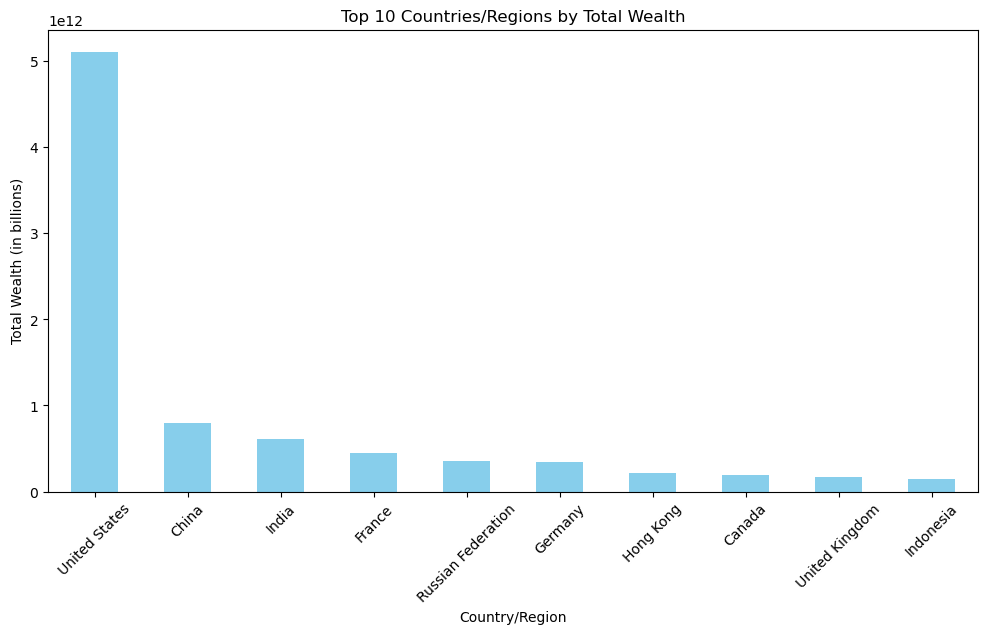


Wealth by Industry:
Industry
Technology         3.142060e+12
Industrial         9.705800e+11
Finance            9.451600e+11
Retail             9.176800e+11
Diversified        9.084300e+11
Consumer           8.191200e+11
Energy             4.959200e+11
Food & Beverage    3.785400e+11
Health Care        3.441300e+11
Real Estate        3.067800e+11
Commodities        2.923500e+11
Media & Telecom    2.148200e+11
Services           1.679400e+11
Entertainment      1.505600e+11
Name: Total_net_worth, dtype: float64


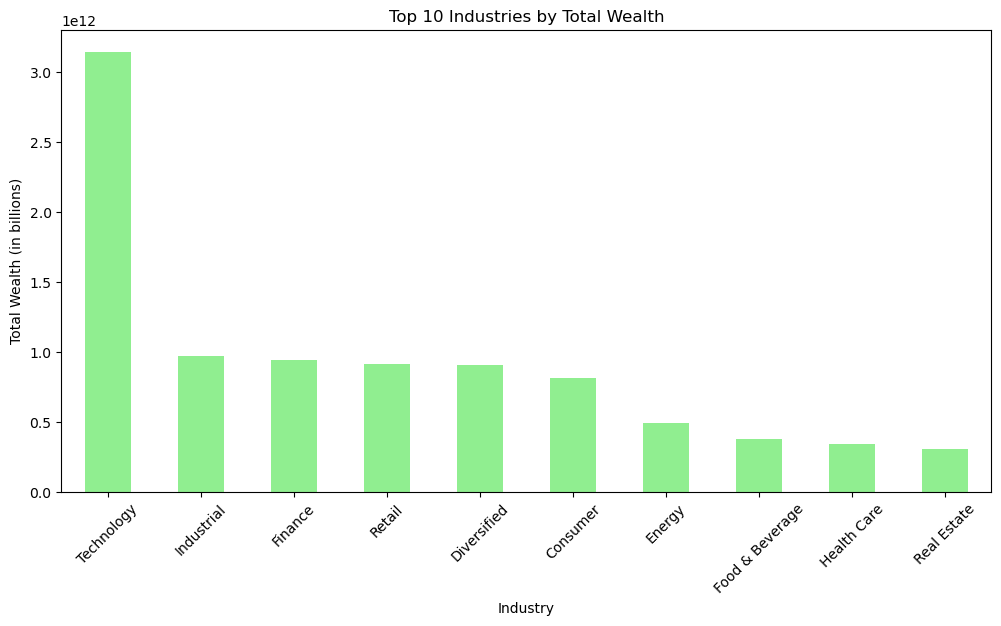


Largest Gainers (Year-to-Date):
               Name  $_YTD_change
0         Elon Musk  2.180000e+11
2   Mark Zuckerberg  9.550000e+10
10     Jensen Huang  7.770000e+10
3     Larry Ellison  7.530000e+10
1        Jeff Bezos  7.210000e+10

Largest Losers (Year-to-Date):
                            Name  $_YTD_change
4                Bernard Arnault -2.640000e+10
20  Francoise Bettencourt Meyers -2.410000e+10
17                   Carlos Slim -1.970000e+10
46                   Colin Huang -1.510000e+10
92              Francois Pinault -1.340000e+10

Total Wealth: $10054070000000.00 billion
Average Wealth: $20108140000.00 billion


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Exploratory Data Analysis (EDA)

# 1. Overview of the data
print("Basic Statistics:")
print(data[['Total_net_worth', '$_Last_change', '$_YTD_change']].describe())  # Summary statistics for numeric columns

# 2. Top 10 richest individuals
print("\nTop 10 Richest Individuals:")
print(data.nlargest(10, 'Total_net_worth')[['Rank', 'Name', 'Total_net_worth']])

# 3. Distribution of wealth by country/region
country_wealth = data.groupby('Country_/_Region')['Total_net_worth'].sum().sort_values(ascending=False)
print("\nWealth by Country/Region:")
print(country_wealth)

# Plot distribution of wealth by country/region
plt.figure(figsize=(12, 6))
country_wealth.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries/Regions by Total Wealth")
plt.ylabel("Total Wealth (in billions)")
plt.xlabel("Country/Region")
plt.xticks(rotation=45)
plt.show()

# 4. Distribution of wealth by industry
industry_wealth = data.groupby('Industry')['Total_net_worth'].sum().sort_values(ascending=False)
print("\nWealth by Industry:")
print(industry_wealth)

# Plot distribution of wealth by industry
plt.figure(figsize=(12, 6))
industry_wealth.head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Industries by Total Wealth")
plt.ylabel("Total Wealth (in billions)")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.show()

# 5. Largest gainers and losers in $ YTD change
largest_gainers = data.nlargest(5, '$_YTD_change')[['Name', '$_YTD_change']]
largest_losers = data.nsmallest(5, '$_YTD_change')[['Name', '$_YTD_change']]
print("\nLargest Gainers (Year-to-Date):")
print(largest_gainers)
print("\nLargest Losers (Year-to-Date):")
print(largest_losers)

# 6. Total and average wealth
total_wealth = data['Total_net_worth'].sum()
average_wealth = data['Total_net_worth'].mean()
print(f"\nTotal Wealth: ${total_wealth:.2f} billion")
print(f"Average Wealth: ${average_wealth:.2f} billion")


Top 5 Countries/Regions with the Most Wealth:
Country_/_Region
United States         5.109290e+12
China                 8.018400e+11
India                 6.079000e+11
France                4.503500e+11
Russian Federation    3.564900e+11
Name: Total_net_worth, dtype: float64


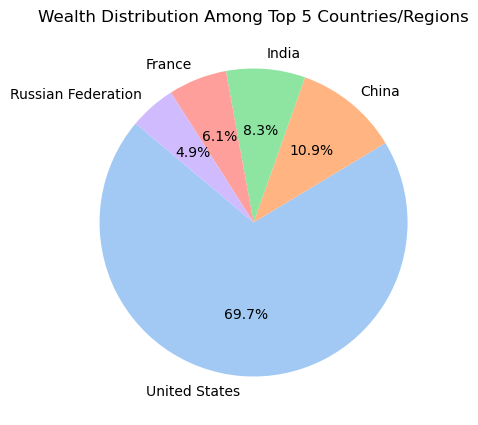


Top 5 Industries with the Most Wealth:
Industry
Technology     3.142060e+12
Industrial     9.705800e+11
Finance        9.451600e+11
Retail         9.176800e+11
Diversified    9.084300e+11
Name: Total_net_worth, dtype: float64


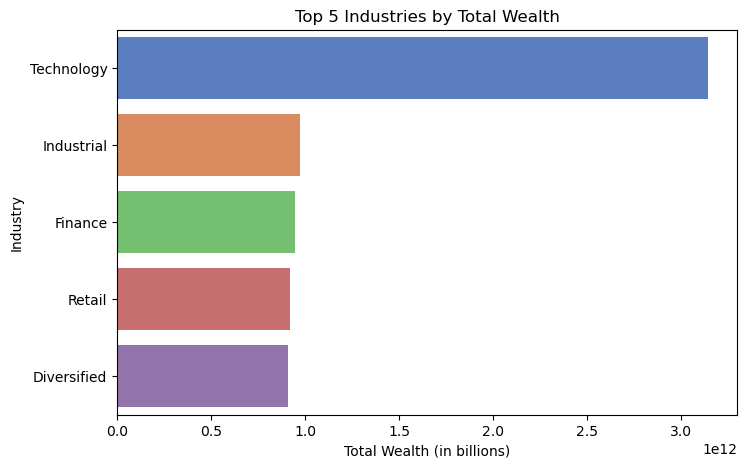


Largest Gainers (Year-to-Date):
               Name  $_YTD_change
0         Elon Musk  2.180000e+11
2   Mark Zuckerberg  9.550000e+10
10     Jensen Huang  7.770000e+10
3     Larry Ellison  7.530000e+10
1        Jeff Bezos  7.210000e+10

Largest Losers (Year-to-Date):
                            Name  $_YTD_change
4                Bernard Arnault -2.640000e+10
20  Francoise Bettencourt Meyers -2.410000e+10
17                   Carlos Slim -1.970000e+10
46                   Colin Huang -1.510000e+10
92              Francois Pinault -1.340000e+10


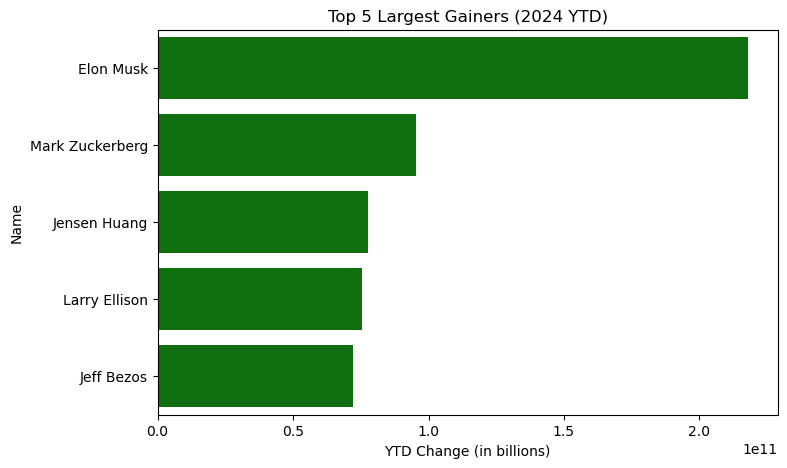

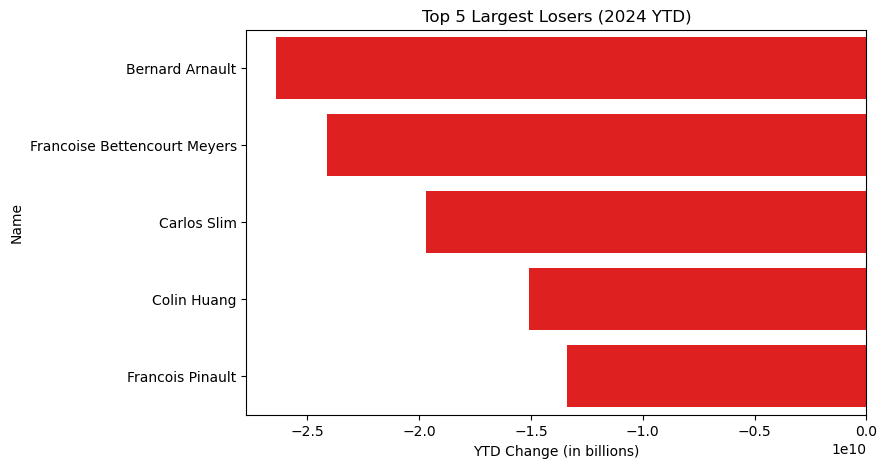


Number of individuals above average wealth: 108
Number of individuals below average wealth: 392


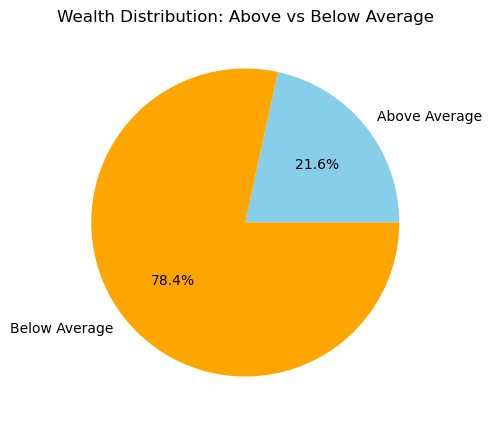


Correlation Between Net Worth and Changes:
                 Total_net_worth  $_Last_change  $_YTD_change
Total_net_worth         1.000000       0.652094      0.816334
$_Last_change           0.652094       1.000000      0.790923
$_YTD_change            0.816334       0.790923      1.000000


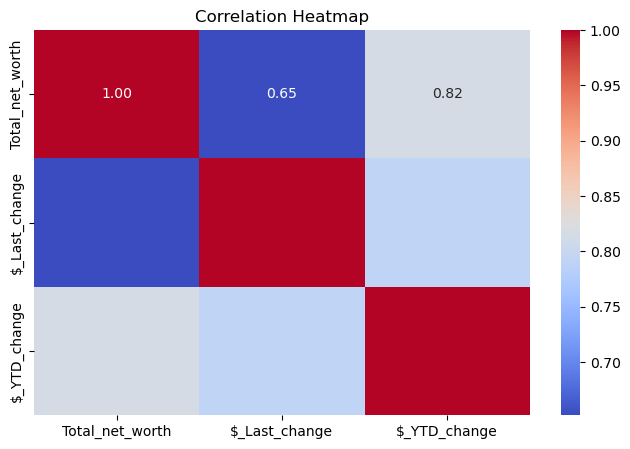

In [11]:
# Step 3: Generating Insights

# 1. Top 5 Countries/Regions with the Most Wealth
top_countries = data.groupby('Country_/_Region')['Total_net_worth'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Countries/Regions with the Most Wealth:")
print(top_countries)

# Insight: Total wealth distribution in top countries
plt.figure(figsize=(8, 5))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Wealth Distribution Among Top 5 Countries/Regions")
plt.ylabel("")  # Remove y-axis label
plt.show()

# 2. Top 5 Industries with the Most Wealth
top_industries = data.groupby('Industry')['Total_net_worth'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Industries with the Most Wealth:")
print(top_industries)

# Insight: Bar chart for industry wealth
plt.figure(figsize=(8, 5))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="muted")
plt.title("Top 5 Industries by Total Wealth")
plt.xlabel("Total Wealth (in billions)")
plt.ylabel("Industry")
plt.show()

# 3. Largest Year-to-Date Gainers and Losers
largest_gainers = data.nlargest(5, '$_YTD_change')[['Name', '$_YTD_change']]
largest_losers = data.nsmallest(5, '$_YTD_change')[['Name', '$_YTD_change']]
print("\nLargest Gainers (Year-to-Date):")
print(largest_gainers)

print("\nLargest Losers (Year-to-Date):")
print(largest_losers)

# Insight: Plot largest gainers and losers
plt.figure(figsize=(8, 5))
sns.barplot(x=largest_gainers['$_YTD_change'], y=largest_gainers['Name'], color="green")
plt.title("Top 5 Largest Gainers (2024 YTD)")
plt.xlabel("YTD Change (in billions)")
plt.ylabel("Name")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=largest_losers['$_YTD_change'], y=largest_losers['Name'], color="red")
plt.title("Top 5 Largest Losers (2024 YTD)")
plt.xlabel("YTD Change (in billions)")
plt.ylabel("Name")
plt.show()

# 4. Wealth Distribution: Are most individuals above or below average?
average_wealth = data['Total_net_worth'].mean()
above_avg = data[data['Total_net_worth'] > average_wealth].shape[0]
below_avg = data[data['Total_net_worth'] <= average_wealth].shape[0]
print(f"\nNumber of individuals above average wealth: {above_avg}")
print(f"Number of individuals below average wealth: {below_avg}")

# Pie chart for wealth distribution
plt.figure(figsize=(8, 5))
plt.pie([above_avg, below_avg], labels=["Above Average", "Below Average"], autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Wealth Distribution: Above vs Below Average")
plt.show()

# 5. Correlation Analysis
print("\nCorrelation Between Net Worth and Changes:")
correlation = data[['Total_net_worth', '$_Last_change', '$_YTD_change']].corr()
print(correlation)

# Heatmap for correlation
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


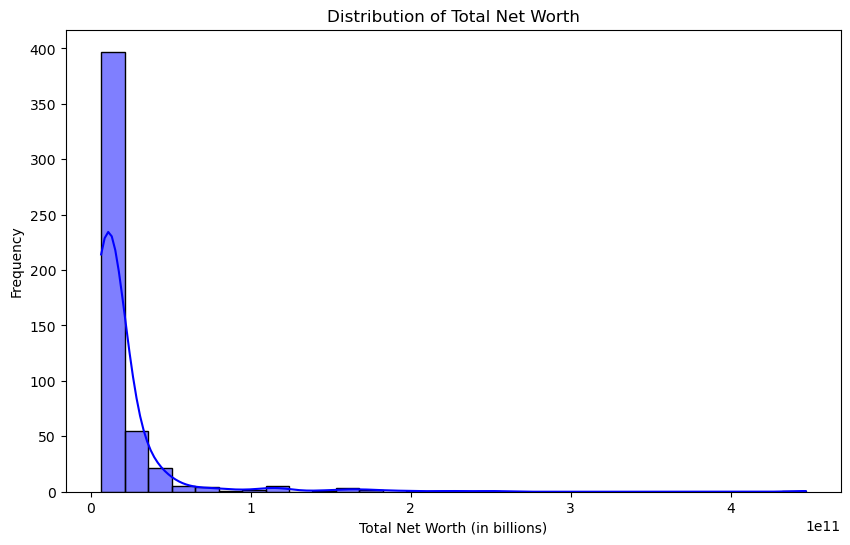

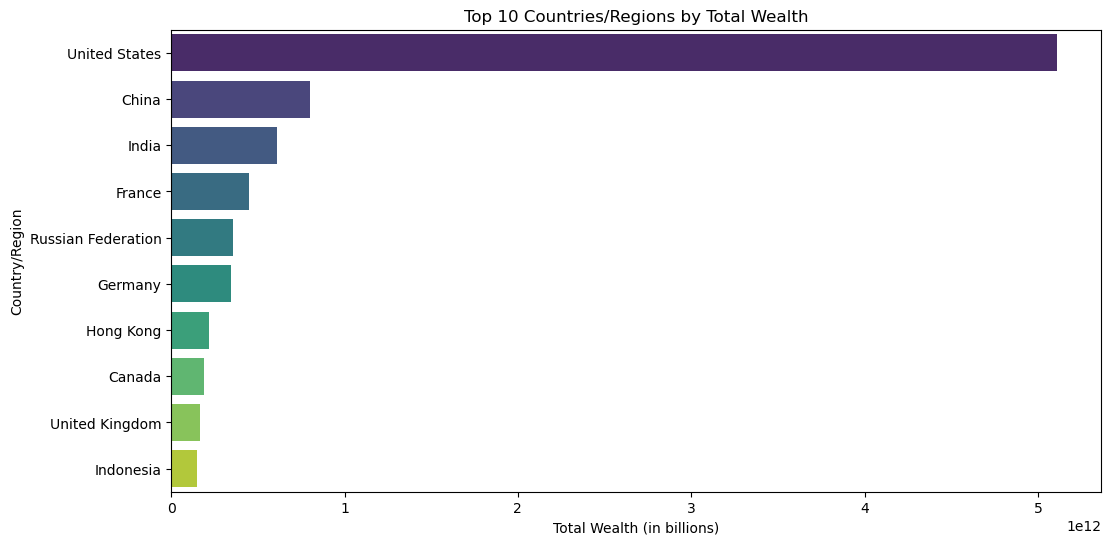

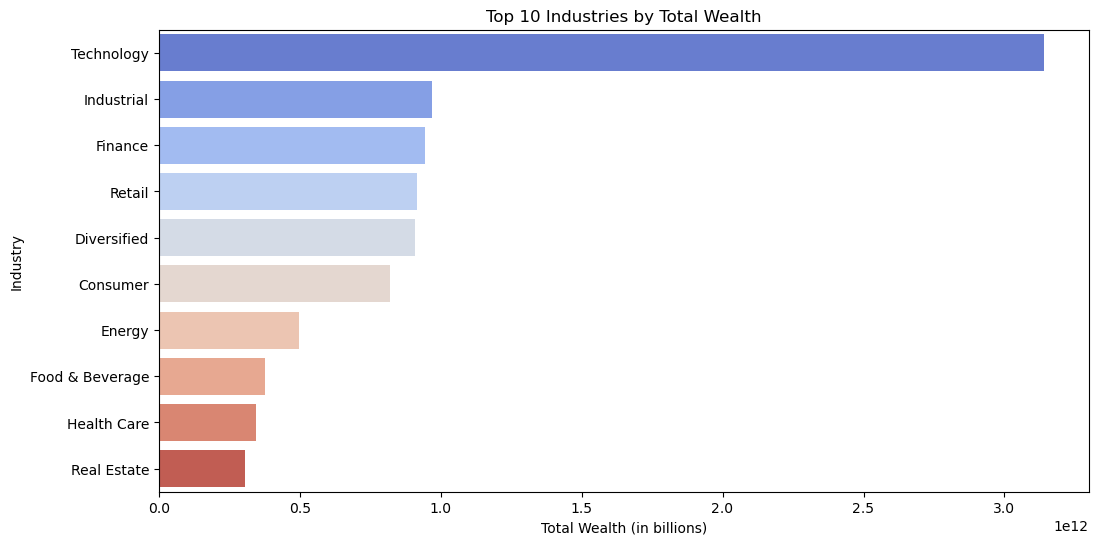

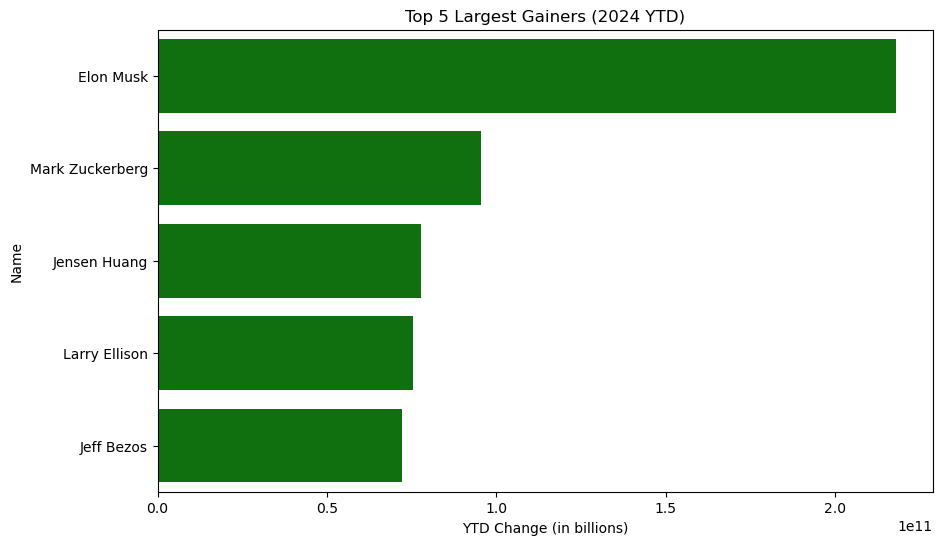

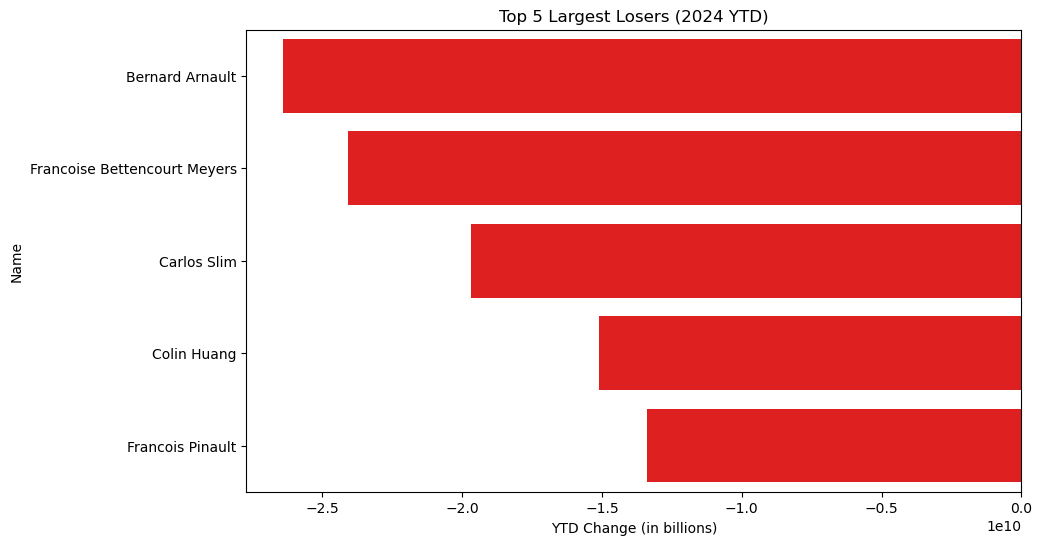

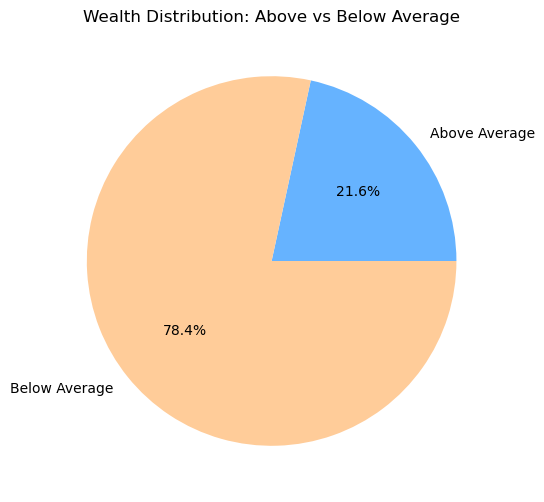

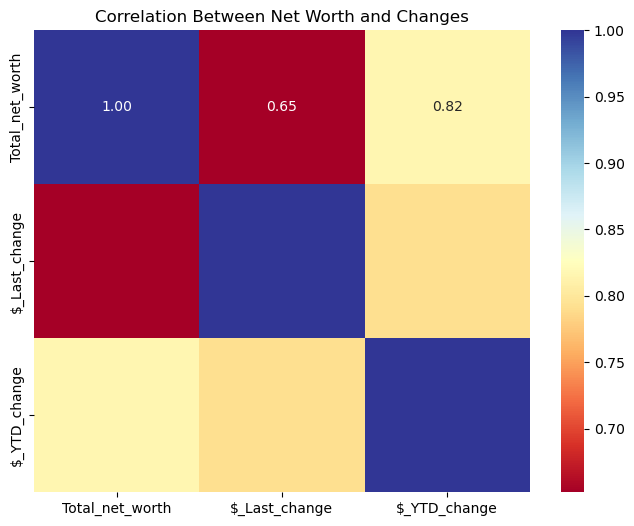

In [12]:
# Step 4: Data Visualization and Storytelling

import matplotlib.ticker as ticker

# 1. Distribution of Total Net Worth
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_net_worth'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Net Worth")
plt.xlabel("Total Net Worth (in billions)")
plt.ylabel("Frequency")
plt.show()

# 2. Wealth by Top 10 Countries/Regions
top_10_countries = data.groupby('Country_/_Region')['Total_net_worth'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")
plt.title("Top 10 Countries/Regions by Total Wealth")
plt.xlabel("Total Wealth (in billions)")
plt.ylabel("Country/Region")
plt.show()

# 3. Wealth by Top 10 Industries
top_10_industries = data.groupby('Industry')['Total_net_worth'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_industries.values, y=top_10_industries.index, palette="coolwarm")
plt.title("Top 10 Industries by Total Wealth")
plt.xlabel("Total Wealth (in billions)")
plt.ylabel("Industry")
plt.show()

# 4. Largest Gainers and Losers (YTD Change)
plt.figure(figsize=(10, 6))
sns.barplot(x=largest_gainers['$_YTD_change'], y=largest_gainers['Name'], color="green")
plt.title("Top 5 Largest Gainers (2024 YTD)")
plt.xlabel("YTD Change (in billions)")
plt.ylabel("Name")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=largest_losers['$_YTD_change'], y=largest_losers['Name'], color="red")
plt.title("Top 5 Largest Losers (2024 YTD)")
plt.xlabel("YTD Change (in billions)")
plt.ylabel("Name")
plt.show()

# 5. Pie Chart: Wealth Distribution Above and Below Average
plt.figure(figsize=(8, 6))
plt.pie([above_avg, below_avg], labels=["Above Average", "Below Average"], autopct='%1.1f%%', colors=["#66b3ff", "#ffcc99"])
plt.title("Wealth Distribution: Above vs Below Average")
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Correlation Between Net Worth and Changes")
plt.show()

In [13]:
from scipy.stats import ttest_ind

# Extracting net worths for Technology and Finance
tech_wealth = data[data['Industry'] == 'Technology']['Total_net_worth']
finance_wealth = data[data['Industry'] == 'Finance']['Total_net_worth']

# Perform t-test
t_stat, p_val = ttest_ind(tech_wealth, finance_wealth, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in wealth between Technology and Finance industries.")
else:
    print("There is no significant difference in wealth between Technology and Finance industries.")

T-statistic: 2.5810208949943663, P-value: 0.010850218119158142
There is a significant difference in wealth between Technology and Finance industries.


C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


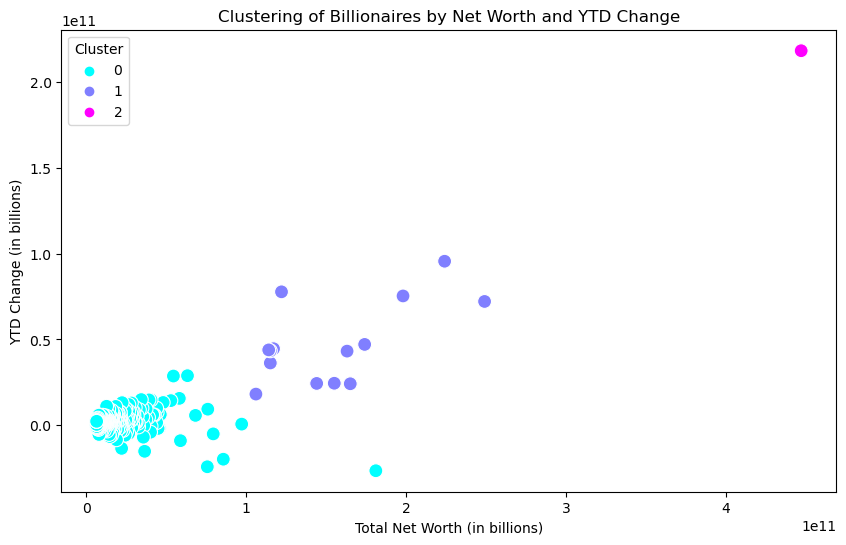

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting features for clustering
features = data[['Total_net_worth', '$_YTD_change']].dropna()

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_net_worth', y='$_YTD_change', hue='Cluster', data=data, palette='cool', s=100)
plt.title("Clustering of Billionaires by Net Worth and YTD Change")
plt.xlabel("Total Net Worth (in billions)")
plt.ylabel("YTD Change (in billions)")
plt.legend(title='Cluster')
plt.show()

Mean Squared Error: 2.7654805518377068e+20
R-squared Value: 0.8977272215360099


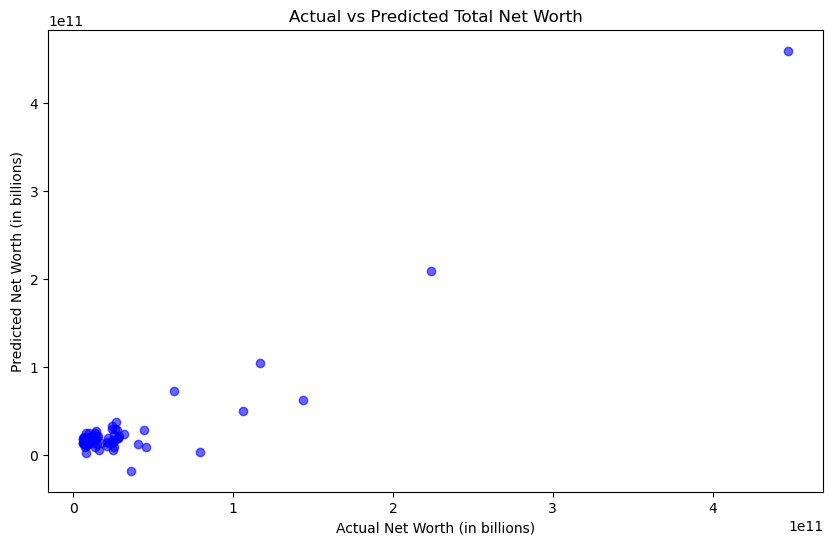

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data
X = data[['$_YTD_change']].fillna(0)
y = data['Total_net_worth'].fillna(0)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

# Visualizing predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title("Actual vs Predicted Total Net Worth")
plt.xlabel("Actual Net Worth (in billions)")
plt.ylabel("Predicted Net Worth (in billions)")
plt.show()